code

In [1]:
!pip install -q gdown umap-learn

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp, chi2_contingency


In [3]:
# plotting defaults
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [12]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [17]:

real_path = "/content/drive/MyDrive/GNCIPL_DATASET/Bank_Transaction.csv"
synthetic_path = "/content/drive/MyDrive/GNCIPL_DATASET/Synthetic_Bank_Data.csv"
augmented_path = "/content/drive/MyDrive/GNCIPL_DATASET/Augmented_data.csv"

import pandas as pd

real = pd.read_csv(real_path)
synthetic = pd.read_csv(synthetic_path)
augmented = pd.read_csv(augmented_path)


print("Datasets loaded successfully:")
print("Real data shape:", real.shape)
print("Synthetic data shape:", synthetic.shape)
print("Augmented data shape:", augmented.shape)


Datasets loaded successfully:
Real data shape: (200000, 24)
Synthetic data shape: (20000, 24)
Augmented data shape: (220000, 24)


In [21]:
# quick overviews
def short_info(df, name, n=3):
    print(f"\n=== {name} ===")
    print("shape:", df.shape)
    display(df.head(n))
    print("dtypes:")
    print(df.dtypes.value_counts())
    print("missing (%) per column (top 10):")
    miss = df.isna().mean().sort_values(ascending=False).head(10)
    display(miss)

short_info(real, "Real (Bank_Transaction)")
short_info(synthetic, "Synthetic (Synthetic_Bank_Data)")
short_info(augmented, "Augmented")



=== Real (Bank_Transaction) ===
shape: (200000, 24)


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com


dtypes:
object     20
int64       2
float64     2
Name: count, dtype: int64
missing (%) per column (top 10):


,0
Customer_ID,0.0
Customer_Name,0.0
Gender,0.0
Age,0.0
State,0.0
City,0.0
Bank_Branch,0.0
Account_Type,0.0
Transaction_ID,0.0
Transaction_Date,0.0



=== Synthetic (Synthetic_Bank_Data) ===
shape: (20000, 24)


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,3de4b9a8-5fa7-42f0-abd1-e6cddae9ebce,Ekaja Oommen,Male,21,Arunachal Pradesh,Tawang,Tawang Branch,Business,bd4ea5bc-ec48-41fb-bfaa-fe2cf5d6ccbb,21-01-2025,...,Clothing,71814.93,Web Browser,"Tawang, Arunachal Pradesh",Desktop,1,INR,+9199975XXXXXX,Hotel reservation,ekajaXXX@XXXXX.com
1,afdbdeb8-4df5-46fc-8fd6-edda7be0a18c,Nicholas Dey,Male,57,Kerala,Trichur,Trichur Branch,Checking,4baffcd6-b380-446d-be0d-7aa15a32f5ef,12-01-2025,...,Entertainment,97653.30,Self-service Banking Machine,"Trichur, Kerala",Mobile,1,INR,+9191533XXXXXX,Sports equipment purchase,nicholasXXXX@XXXXXXX.com
2,fbed2036-9e1f-4b3b-bbff-a9d31753fe4f,Meera Dhaliwal,Female,48,Punjab,Amritsar,Amritsar Branch,Business,e7d70ca4-a452-419a-bbe5-6051582c4ce6,05-01-2025,...,Clothing,36957.22,QR Code Scanner,"Amritsar, Punjab",ATM,1,INR,+9199522XXXXXX,Tuition fee payment,meeraXXXXX@XXXXX.com


dtypes:
object     20
int64       2
float64     2
Name: count, dtype: int64
missing (%) per column (top 10):


,0
Customer_ID,0.0
Customer_Name,0.0
Gender,0.0
Age,0.0
State,0.0
City,0.0
Bank_Branch,0.0
Account_Type,0.0
Transaction_ID,0.0
Transaction_Date,0.0



=== Augmented ===
shape: (220000, 24)


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com


dtypes:
object     20
int64       2
float64     2
Name: count, dtype: int64
missing (%) per column (top 10):


,0
Customer_ID,0.0
Customer_Name,0.0
Gender,0.0
Age,0.0
State,0.0
City,0.0
Bank_Branch,0.0
Account_Type,0.0
Transaction_ID,0.0
Transaction_Date,0.0


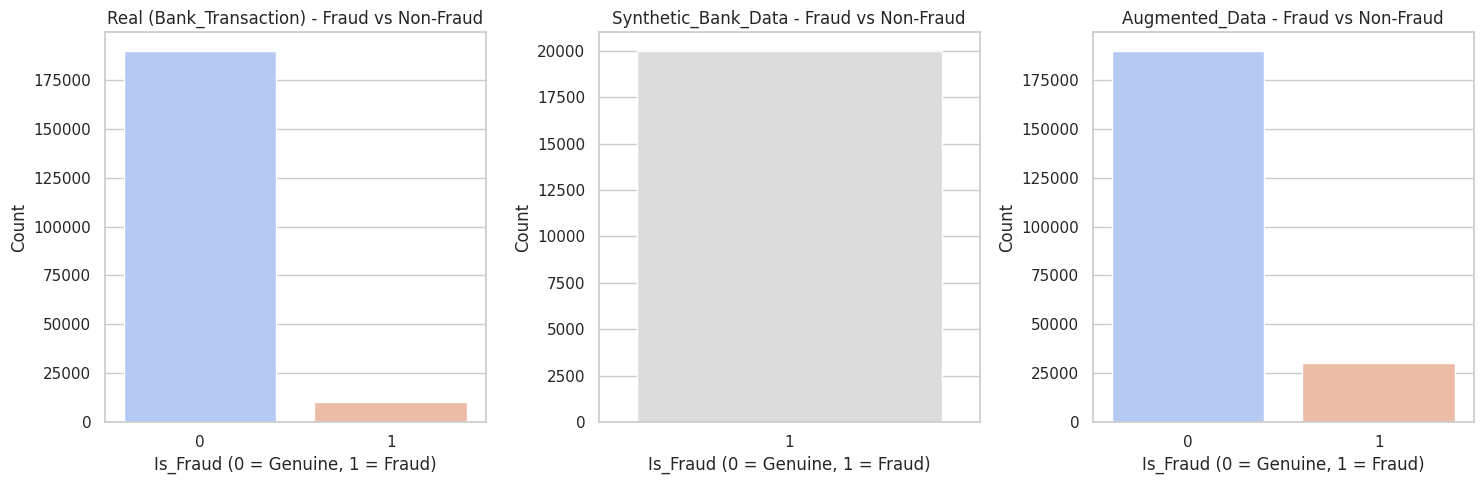

In [32]:
#compare class distribution

plt.figure(figsize=(15, 5))

datasets = [real, synthetic, augmented]
titles = ['Real (Bank_Transaction)', 'Synthetic_Bank_Data', 'Augmented_Data']

for i, data in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x='Is_Fraud', hue='Is_Fraud', data=data, palette='coolwarm', legend=False)
    plt.title(f'{titles[i]} - Fraud vs Non-Fraud')
    plt.xlabel('Is_Fraud (0 = Genuine, 1 = Fraud)')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

In [26]:
print("Real columns:\n", real.columns.tolist())
print("\nSynthetic columns:\n", synthetic.columns.tolist())
print("\nAugmented columns:\n", augmented.columns.tolist())


Real columns:
 ['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Transaction_Amount', 'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Account_Balance', 'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud', 'Transaction_Currency', 'Customer_Contact', 'Transaction_Description', 'Customer_Email']

Synthetic columns:
 ['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Transaction_Amount', 'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Account_Balance', 'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud', 'Transaction_Currency', 'Customer_Contact', 'Transaction_Description', 'Customer_Email']

Augmented columns:
 ['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID

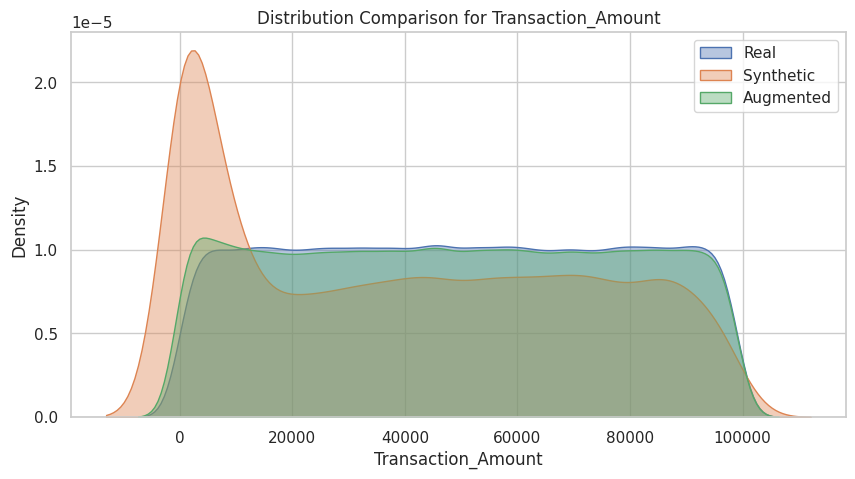

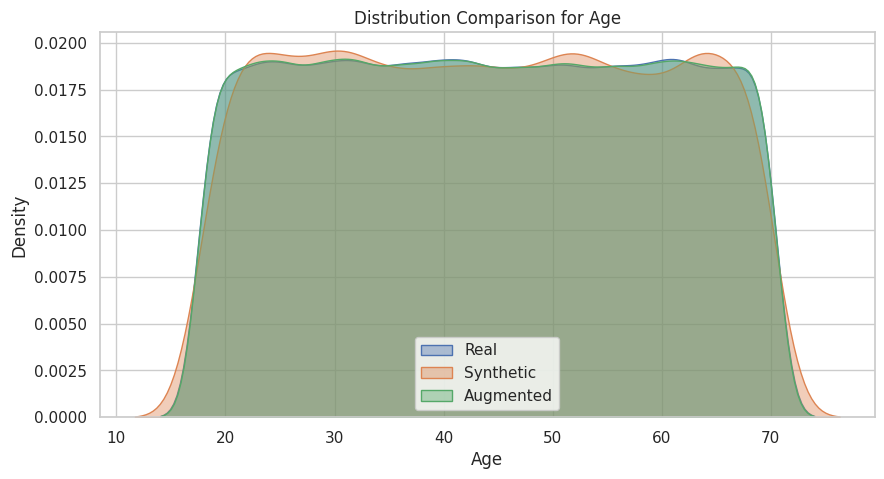

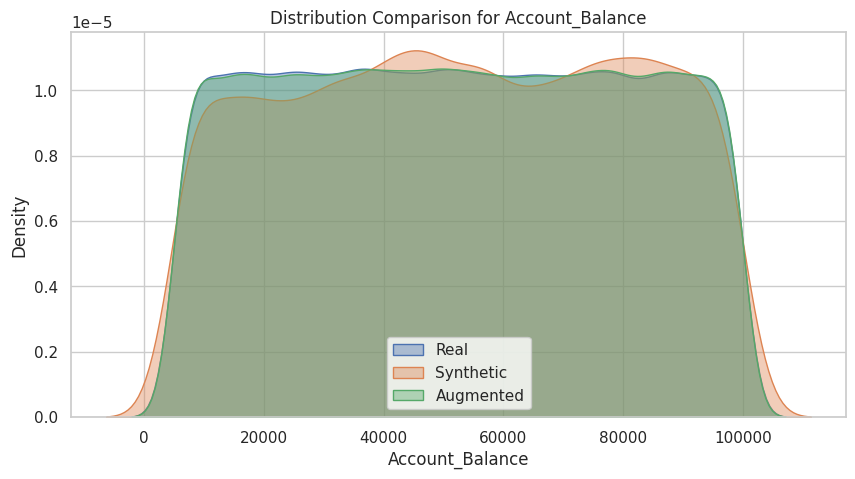

In [34]:
# === 2️⃣ Feature Distribution Comparison ===
features = ['Transaction_Amount', 'Age', 'Account_Balance']

for col in features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(real[col], label='Real', fill=True, alpha=0.4)
    sns.kdeplot(synthetic[col], label='Synthetic', fill=True, alpha=0.4)
    sns.kdeplot(augmented[col], label='Augmented', fill=True, alpha=0.4)
    plt.title(f'Distribution Comparison for {col}')
    plt.legend()
    plt.show()

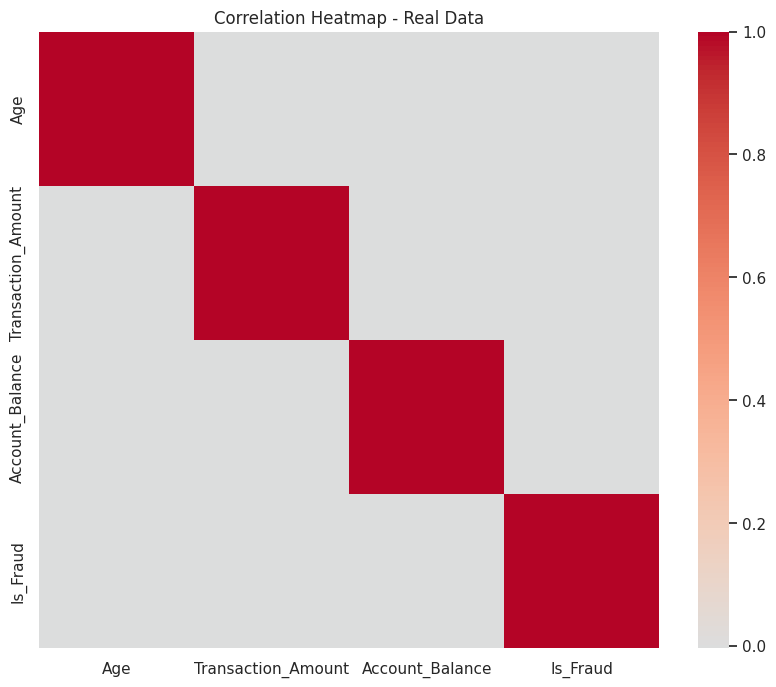

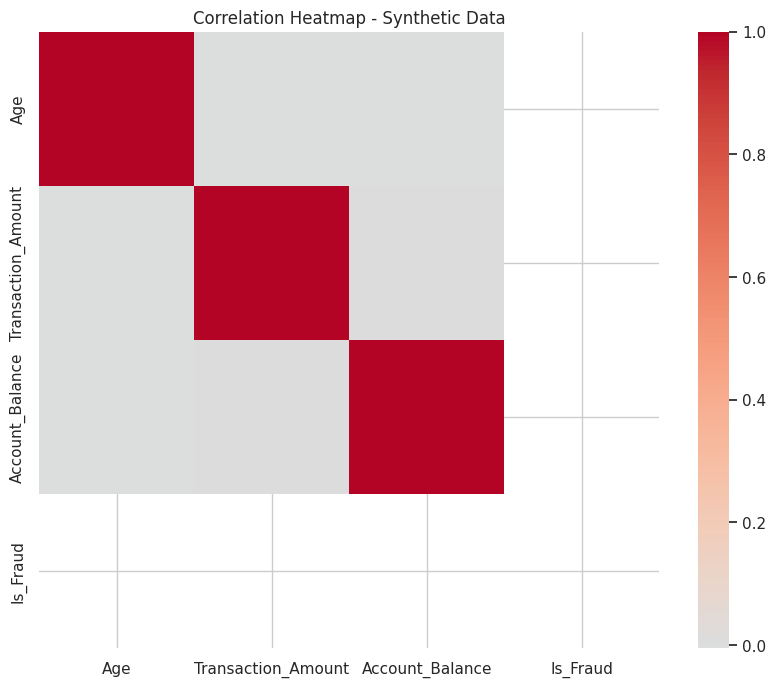

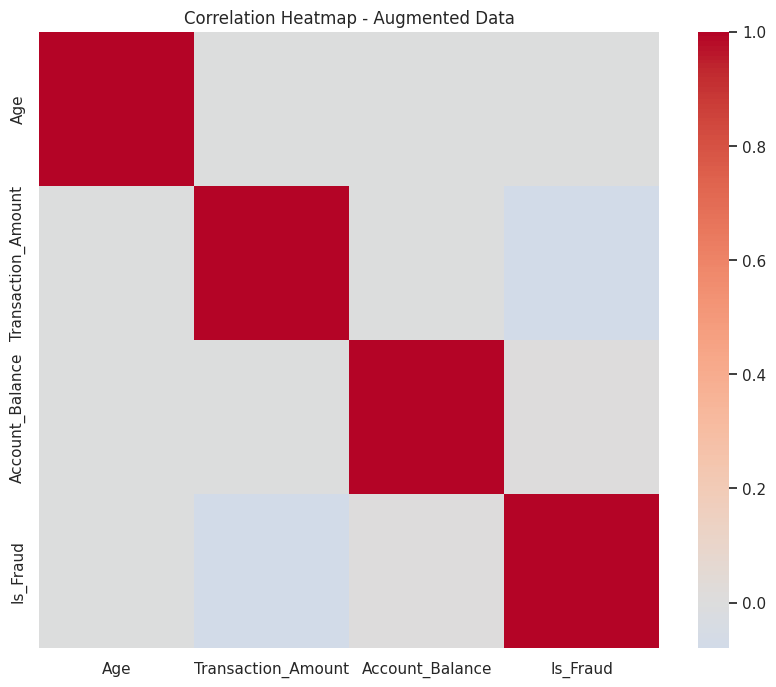

In [35]:
#  Correlation Heatmaps
for data, name in zip([real, synthetic, augmented],
                      ['Real', 'Synthetic', 'Augmented']):
    plt.figure(figsize=(10, 8))
    numeric_data = data.select_dtypes(include=np.number)
    sns.heatmap(numeric_data.corr(), cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap - {name} Data')
    plt.show()

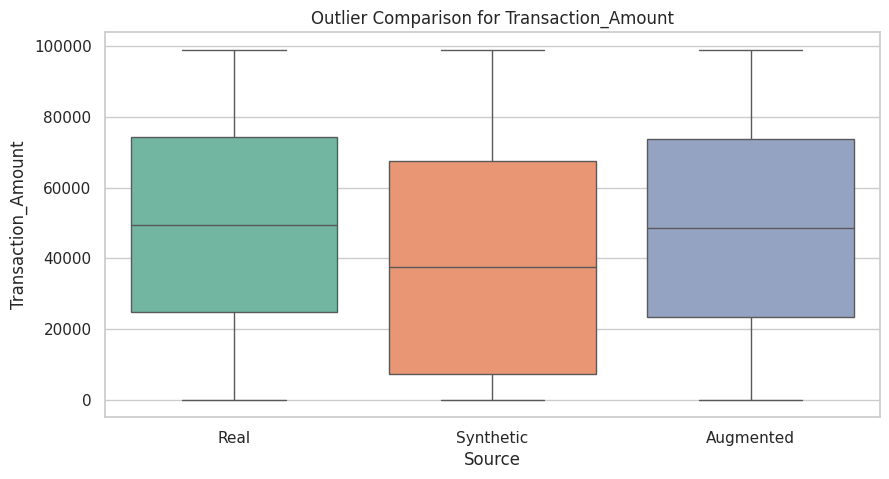

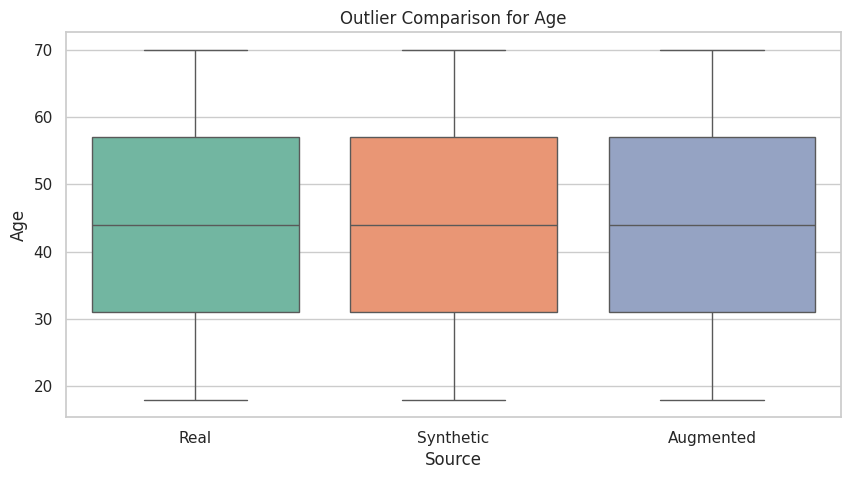

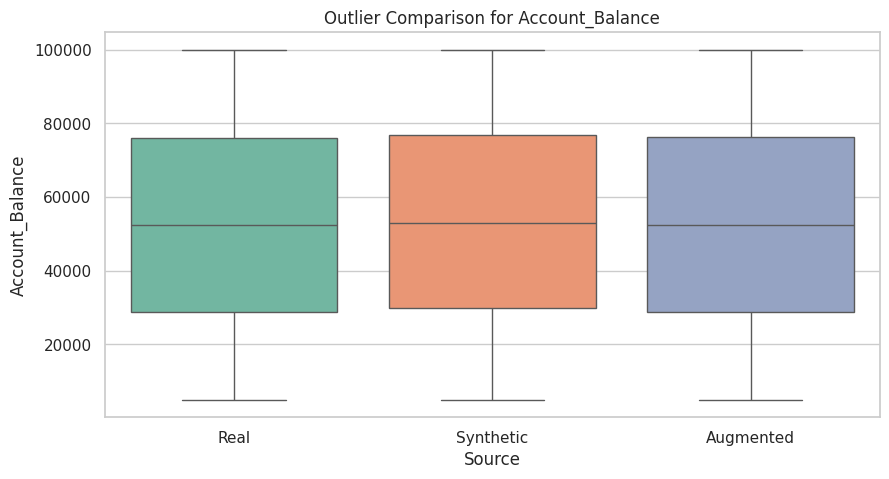

In [37]:
#  Outlier Comparison using Boxplots
for col in features:
    combined = pd.concat([
        real[[col]].assign(Source='Real'),
        synthetic[[col]].assign(Source='Synthetic'),
        augmented[[col]].assign(Source='Augmented')
    ])
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=combined, x='Source',hue="Source", y=col, palette='Set2',legend=False)
    plt.title(f'Outlier Comparison for {col}')
    plt.show()

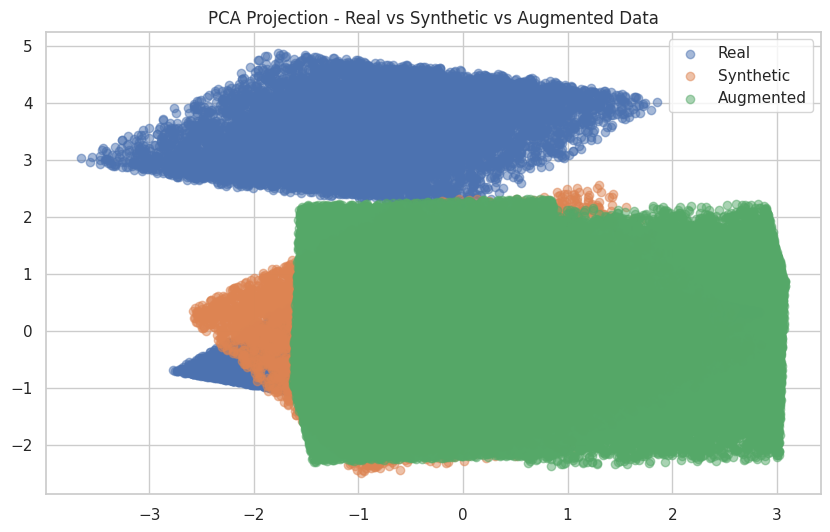

In [38]:
#  Dimensionality Visualization using PCA
scaler = StandardScaler()

real_scaled = scaler.fit_transform(real.select_dtypes(include=np.number).dropna())
synthetic_scaled = scaler.fit_transform(synthetic.select_dtypes(include=np.number).dropna())
augmented_scaled = scaler.fit_transform(augmented.select_dtypes(include=np.number).dropna())

pca = PCA(n_components=2)
real_pca = pca.fit_transform(real_scaled)
synthetic_pca = pca.fit_transform(synthetic_scaled)
augmented_pca = pca.fit_transform(augmented_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], alpha=0.5, label='Real')
plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], alpha=0.5, label='Synthetic')
plt.scatter(augmented_pca[:, 0], augmented_pca[:, 1], alpha=0.5, label='Augmented')
plt.title("PCA Projection - Real vs Synthetic vs Augmented Data")
plt.legend()
plt.show()

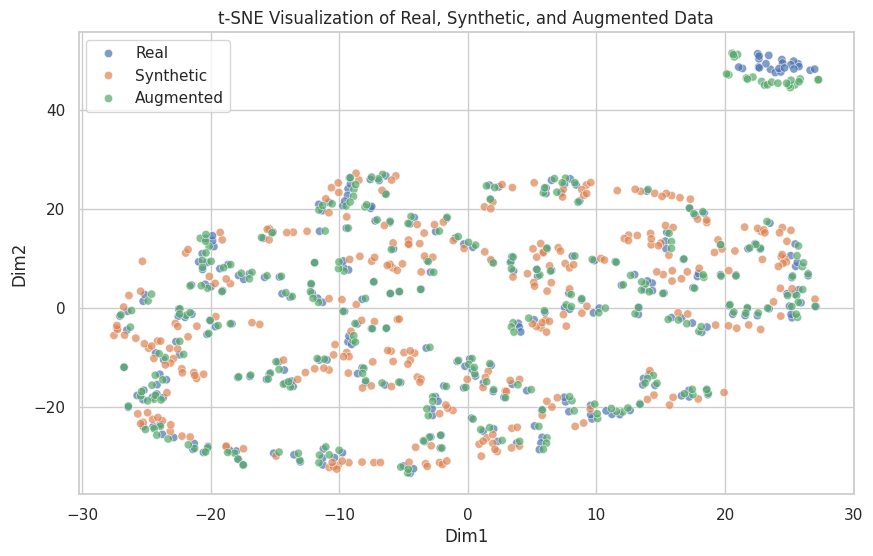

Visualization completed successfully!


In [39]:
# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
combined_scaled = np.vstack([real_scaled[:300], synthetic_scaled[:300], augmented_scaled[:300]])
labels = (['Real'] * 300) + (['Synthetic'] * 300) + (['Augmented'] * 300)

tsne_result = tsne.fit_transform(combined_scaled)
tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['Dataset'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Dataset', alpha=0.7)
plt.title("t-SNE Visualization of Real, Synthetic, and Augmented Data")
plt.legend()
plt.show()

print("Visualization completed successfully!")